## Центральная предельная теорема
Возьмем в качестве рассматриваемого непрерывного распределения распределение Парето. 
https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9F%D0%B0%D1%80%D0%B5%D1%82%D0%BE
Импортируем необходимые библиотеки.

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math

Формируем с помощью функции pareto.rvs из scipy.stats выборку объема 1000 случайных значений. 

In [40]:
sigma=3
mu=0
par= sts.pareto(sigma,mu)
sample=par.rvs(1000)

Строим график плотности распределения вероятностей для случайной выборки объема 1000 с помощью функции plt.hist с 30 интервалами.  Чтобы величины были в одном масштабе, выставляем у гистограммы значение параметра normed=true.

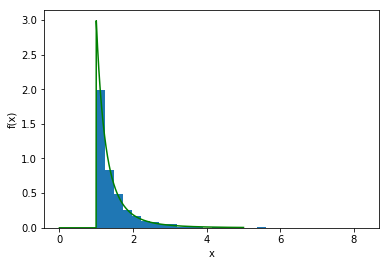

In [41]:
from matplotlib.pyplot import subplots
fig, ax = subplots()
plt.hist(sample, bins=30, normed=True, label='Experimental pdf')
x = np.linspace(0,5,1000)
pdf = par.pdf(x)
plt.plot(x, pdf, color='green', label='Theoretical pdf')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')

Математическое ожидание (mj) и дисперсия (disp) распределения Парето считаются по формулам:
$$ mj=\frac{\sigma\mu}{(\sigma-1)}$$
$$ disp=(\frac{\mu}{\sigma-1})^2(\frac{\sigma}{\sigma-2})$$
Находим их, используя стандартные функции mean() и var(), соответственно.

In [42]:
mj=par.mean()
disp=par.var()
print mj, disp

1.5 0.75


Получаем функцию, принимающую на вход объем выборок и генерирующую 1000 выборок этого объема, после чего строящую соответствующие графики.

In [43]:
def choice(n):
    x = np.linspace(0,10,1000)
    normal = sts.norm(mj,disp/n) #нормальное распределение
    norm_pdf = normal.pdf(x)
    means = []
    for i in xrange(0,1000):
        res = par.rvs(n)
        means.append(res.mean()) 
    from matplotlib.pyplot import subplots
    fig, ax = subplots()
    plt.hist(means,normed = True)
    plt.plot(x,norm_pdf)
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')

Вызываем функцию для выборки объема 5

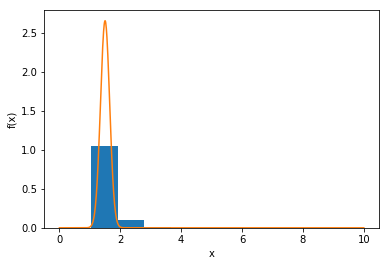

In [44]:
choice(5) 

Вызываем функцию для выборки объема 10

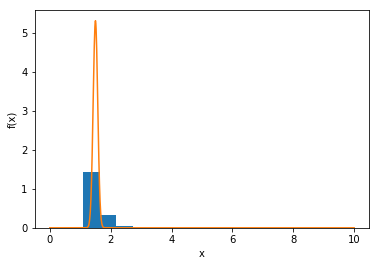

In [45]:
choice(10)

Вызываем функцию для выборки объема 50

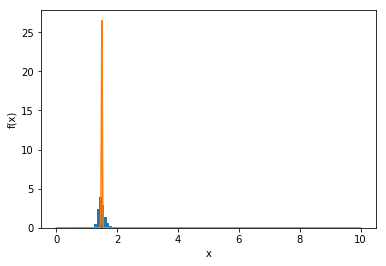

In [46]:
choice(50)

### Вывод
Как видно из графиков, при большом объеме выборок, распределение Парето может быть приближено нормальным распределением, т.е. центральная предельная теорема верна.